<a href="https://colab.research.google.com/github/dmdwn99/Computer-Vision-Study/blob/main/Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Tensorflow 2.0

tensorflow 2.x version을 불러오기 위한 코드이다. 22.05.18 기준 2.8.0 version을 불러온다. 

In [19]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

2.8.0


# 2. Tensorflow 기초
AND, OR, XOR 연산 신경망 네트워크 구성


### 2.1 난수 생성

신경망은 많은 숫자로 구성된 행렬이다. 신경망 행렬의 숫자는 랜덤한 값으로 지정해야 하며 이 과정을 초기화라고 한다.

현재 Xavier 초기화, He 초기화가 주로 사양된다.


In [10]:
# 균일 분포 난수
# 균일 분포란 최솟값, 최댓값 사이의 모든 수가 나올 확률이 동일한 분포에서 수를 뽑는 것
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.06046999], shape=(1,), dtype=float32)


In [11]:
# shape 변경
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.16510677 0.6045232  0.1250422  0.66632354], shape=(4,), dtype=float32)


In [12]:
# 정규 분포 난수
# 평균과 표준편차를 통해 난수 생성
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([ 0.41388807 -1.2695419  -1.1798301   1.6469501 ], shape=(4,), dtype=float32)


### 2.2 뉴런 만들기

신경망은 뉴련이 여러 개 모여 레이어를 구성한 후 레이어를 다시 모아 구성한 형태이다. 

뉴런은 입력, 가중치, 활성화 함수, 출력으로 구성된다. 

활성화 함수는 뉴런의 출력값을 정하는 함수로 시그모이드, ReLU가 주로 사용된다. 

은닉층(가중치와 활성화 함수)을 다수 사용하는 딥러닝 시대가 되면서 ReLU가 더 많이 사용된다. 

In [54]:
# 시그모이드 함수
import math
def sigmoid(x):
  return 1/ (1+math.exp(-x))

아래 코드에서 x는 입력, y는 기댓값, w는 가중치, output은 실제 출력을 의미한다. 실제 출력과 기대값의 차를 error라고 할 때 뉴런의 학습은 error가 y와 가까워지게 하여 출력으로 기댓값에 가까운 값을 얻는 것이다.


In [20]:
# 뉴런의 입출력 정의
x = 1 
y = 0 
w = tf.random.normal([1],0,1) 
output = sigmoid(x * w) 
print(output)

0.24030373009490014


경사 하강법을 이용하여 뉴런을 학습시키는데 이는 w에 입력과 학습률과 에러를 곱한 값을 더해는 것이다. 경사 하강법은 손실 곡선을 미분한 후, 그 값을 이용해 가중치가 손실이 가장 낮아지는 지점에 도달하도록 반복 계산하는 것이다. 학습률은 적정 수치로 설정해야 하여 0.1로 설정하였다.

In [23]:
# 경사 하강법을 이용한 뉴런 학습 
for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 -0.0009021375906307796 0.0009021375906307796
199 -0.0008940762189647127 0.0008940762189647127
299 -0.0008861623857946855 0.0008861623857946855
399 -0.0008783846567311402 0.0008783846567311402
499 -0.0008707410893611822 0.0008707410893611822
599 -0.0008632326563753862 0.0008632326563753862
699 -0.000855847627516772 0.000855847627516772
799 -0.0008485940481325096 0.0008485940481325096
899 -0.0008414564140009434 0.0008414564140009434
999 -0.0008344435653364118 0.0008344435653364118


입력이 0, 출력이 1인 뉴런은 경사하강법의 업데이트 식이 w = w + x * 0.1 * error 이므로 w에 더해지는 값이 없어서 w가 변하지 않는다.



In [24]:
# 입력 0, 출력 1 뉴런
x = 0
y = 1
w = tf.random.normal([1],0,1)
for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


위와 같은 경우를 방지하기 위해 편향(bias)를 뉴런에 넣어준다. 편향은 w처럼 난수로 초기화되어 뉴런에 더해진다.

In [25]:
# 입력 0, 출력 1 뉴런에 편향(bias) 추가
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x * w + 1 * b)
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 0.12669975559755853 0.8733002444024415
199 0.05853422834856159 0.9414657716514384
299 0.03753765430098177 0.9624623456990182
399 0.027521897736728085 0.9724781022632719
499 0.02169077509349282 0.9783092249065072
599 0.017884181816009814 0.9821158181839902
699 0.01520709793896402 0.984792902061036
799 0.013223331946426109 0.9867766680535739
899 0.011695114708022092 0.9883048852919779
999 0.010482130125583633 0.9895178698744164


# 3. 신경망 네트워크: AND







AND 연산은 입력이 모두 참이면 참이 되고 그 밖의 경우는 모두 거짓이 된다. 입력을 2개로 가정하였을 때 AND 연산 신경망 네트워크는 아래와 같다. numpy는 파이썬의 list보다 적은 메모리를 차지하며 계산속도가 빠르고, 각 원소에 대한 연산이 가능하여 list와 달리 실수를 곱할 수 있다.

In [43]:
# AND 연산 수행 뉴런
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 200 == 199:
    print(i, error_sum)

199 -0.1049993094662639
399 -0.06379302364434011
599 -0.045689990760675044
799 -0.035490195472640415
999 -0.02896215680661579
1199 -0.024434712679208614
1399 -0.02111642006507088
1599 -0.018581666285145345
1799 -0.01658465209174447
1999 -0.014970596530711984


학습시킨 네트워크의 성능을 확인했을 때 실제 출력과 기댓값이 유사함을 알 수 있다. 마지막 출력값은 부동소수점으로 표현되었다.

In [44]:
# 학습시킨 네트워크 성능 확인
for i in range(4):
  print('X:', x[i],'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))


X: [1 1] Y: [1] Output: 0.9650507297514107
X: [1 0] Y: [0] Output: 0.02476762018549661
X: [0 1] Y: [0] Output: 0.024843057112480513
X: [0 0] Y: [0] Output: 2.3430657725269195e-05


# 4. 신경망 네트워크 OR

OR 연산은 입력 중 하나만 참이면 참이 되고 모두 거짓일 경우에만 거짓이 된다. 입력을 2개로 가정하였을 때 OR 연산 신경망 네트워크는 아래와 같다.

In [31]:
# OR 연산 수행 뉴런
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 200 == 199:
    print(i, error_sum)

199 -0.044917106233836324
399 -0.024531351631027126
599 -0.01676813847950641
799 -0.012696180036589073
999 -0.010198176137218552
1199 -0.008513151685241652
1399 -0.007301484752960975
1599 -0.006388863027131042
1799 -0.005677963612088381
1999 -0.005107108173416065


학습시킨 네트워크의 성능을 확인했을 때 실제 출력과 기댓값이 유사함을 알 수 있다. 

In [32]:
# 학습시킨 네트워크 성능 확인
for i in range(4):
  print('X:', x[i],'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999972745488006
X: [1 0] Y: [1] Output: 0.9898766674681084
X: [0 1] Y: [1] Output: 0.9898468264555786
X: [0 0] Y: [0] Output: 0.025323519112645257


# 5. 신경망 네트워크 XOR 

XOR 연산은 OR 연산과 비슷 하지만 한 가지 차이가 있는데, 홀수 개의 입력이 참일때만 참이 된다. 입력이 2개일 때는 입력이 서로 다를 경우가 참이 된다. XOR 연산 신경망 네트워크를 AND, OR 네트워크와 같이 작성했다. 에러 값은 점점 줄어들다가 어느 순간 변하지 않게 된다.

In [38]:
# 기존과 동일한 XOR 연산 수행 뉴런
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 200 == 199:
    print(i, error_sum)

199 0.003543547315796758
399 0.0001440229401749038
599 5.851383592436754e-06
799 2.6246038298261e-07
999 3.7228422566926156e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


학습시킨 네트워크의 성능을 확인했을 때 실제 출력과 기댓값이 큰 차이를 보이게 된다.

In [36]:
# 학습시킨 네트워크 성능 확인
for i in range(4):
  print('X:', x[i],'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


AND 네트워크 가중치와 XOR 네트워크 가중치의 값을 비교해보았을 때 AND 네트워크 가중치는 의미가 있는 값을 보이며 두 개의 가중치가 비슷하기 때문에 중요도 또한 비슷하다. 반면에 XOR 네트워크 가중치는 너무 작은 값이여서 어떤 일을 하려는지 명확하지 않다.  

In [37]:
# XOR 네트워크 가중치, 편향 확인
print('w', w)
print('b', b)

w tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


In [45]:
# AND 네트워크 가중치, 편향 확인
print('w', w)
print('b', b)

w tf.Tensor([6.988303  6.9914217], shape=(2,), dtype=float32)
b tf.Tensor([-10.661442], shape=(1,), dtype=float32)


위 문제의 해결책은 여러개의 퍼셉트론을 사용하는 것이다. 퍼셉트론과 뉴런의 원조격이다. 케라스를 사용해 XOR 네트워크를 작성하였다. 케라스는 오픈소스 신경망 라이브러리로 사용자 친화적으로 개발되어서 사용이 매우 편리하여 초보들에게 유용한 라이브러리이다. 하지만 디테일한 조작은 텐서플로우에서 가능하므로 목적에 따라 라이브러리를 선택하면 된다.


In [56]:
# tf.keras를 사용한 XOR 네트워크
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])


model = tf.keras.Sequential([ 
  tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
  tf.keras.layers.Dense(units=1, activation='sigmoid')                      
])
# 
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3),loss='mse')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


keras에서 model은 딥러닝 계산을 간편하게 하기 위한 클래스이다. model에 여러 구조 중 Sequential 구조를 사용하였는데 Sequential 구조는 순차적으로 레이어 층을 더하는 순차모델이다. tk.keras.layers.Dense를 통해 레이어를 정의하였다. Dense는 기본적인 레이어로 레이어의 입력과 출력 사이에 있는 모든 뉴런이 연결되어 있는 레이어이다. 

compile은 모델의 최적화와 관련된 메소드다. optimizer는 딥러닝의 학습식을 정의하는데, 위 model에서는 SGD(확률적 경사 하강법)을 사용한다. loss는 error와 비슷한 개념으로 딥러닝은 loss를 줄이는 방향으로 학습한다. mse는 평균 제곱 오차를 의미한다.

전체적인 네트워크의 구조는 아래 그림과 같다.


   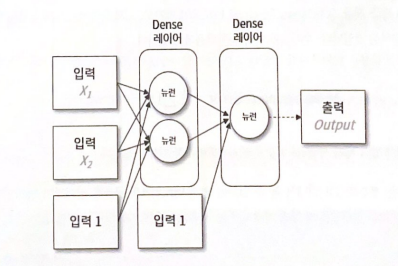

In [57]:
# 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2809
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2762
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2670
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2658
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2656
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2659
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2656
Epoch 11/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2651
Epoch 13/2000
4/4 [==============================

fit 함수를 통해 모델을 학습시켰다. epochs는 모델의 학습 횟수를 결정한다. 

In [58]:
# 네트워크 평가
model.predict(x)

array([[0.11421388],
       [0.91694415],
       [0.91685617],
       [0.06566757]], dtype=float32)

predict 함수를 통해 네트워크를 평가할 수 있다. 앞선 XOR 연산 뉴런과 비교하였을 때 첫 번째와 네 번째는 0에 가깝게, 두 번째와 세 번째는 1에 가깝게 나온 것을 볼 수 있다.

In [59]:
# 2-레이어 XOR 네트워크의 가중치, 편향
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_12/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-3.37734 , -6.176695],
       [-3.369759, -6.100956]], dtype=float32)>
<tf.Variable 'dense_12/bias:0' shape=(2,) dtype=float32, numpy=array([4.8444343, 2.0527897], dtype=float32)>
<tf.Variable 'dense_13/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 6.6843934],
       [-7.1895485]], dtype=float32)>
<tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([-2.9158242], dtype=float32)>


model의 가중치는 model.weights에 저장되어 있다. 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치는 kernel이고, 편향과 연결된 가중치는 bias로 표시된다. 뉴런, 퍼셉트론의 개수가 많아져 가중치들이 어떤 일을 하는지 눈에 잘 들어오지 않아 네트워크의 상황을 잘 알 수 있는 수치를 시각화하여 확인해봤다.

# 6. 시각화 기초


### 6.1 matplotlib.pyplot

matplotlib.pyplot은 파이썬에 대표적인 시각화 라이브러리다.

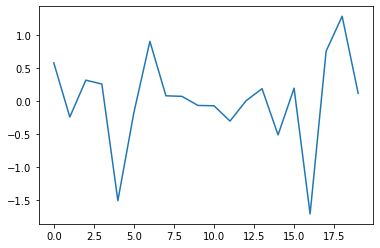

In [61]:
# 꺽은선 그래프
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

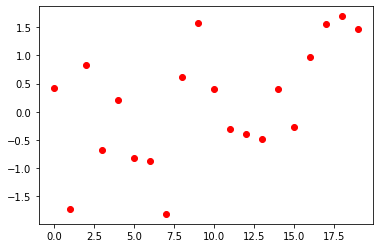

In [63]:
# 점선 그래프
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'ro')
plt.show()

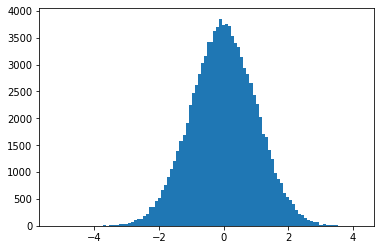

In [66]:
# 정규분포 히스토그램
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal,bins=100) #bins: 데이터를 나눌 영역의 수
plt.show()

### 6.2 2-레이어 XOR 네트워크의 정보 시각화

history라는 변수에 tf.keras가 학습을 진행한 내용을 저장하였고 여기에 있는 정보를 불러와 시각화 할 수 있다. 아래 그래프는 'loss'의 변화를 그린 그래프이다.

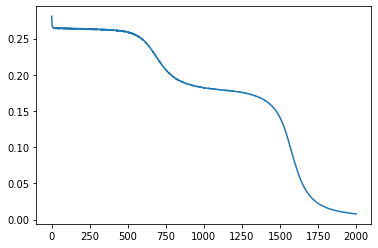

In [68]:
# loss의 변화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])